## Sentiment Analysis & Topic Detection for global Newspaper Articles

This is the final workbook, which ties everything of the project together. At first the data preprocessing pipeline is called for three selected words. [Trump, Brexit, Syria]. All Articles containing these words are selected.

Afterwards the models are applied: The Sentiment analysis finding out the tendencies of each newspaper article and the LDA to detect the topics. The LDA analysis to find out the exact amount of topics was carried out in separate workbooks.

In the bottom part of the notebook a visualization tool is presented, that shows the findings of each model and allows the analysis of the findings.

In [1]:
## Library Imports
import text_transformer as tt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from ipywidgets import widgets
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from lda_utils import *
import pickle

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Preprocessing Pipelines and filtering Articles

In [2]:
trump_df = pickle.load( open( "dataframes/trump_df", "rb" ) )
tokenized_t = pickle.load( open( "dataframes/tokenized_t", "rb" ) )

In [3]:
brexit_df = pickle.load( open( "dataframes/brexit_df", "rb" ) )
tokenized_b = pickle.load( open( "dataframes/tokenized_b", "rb" ) )

In [4]:
syria_df = pickle.load( open( "dataframes/syria_df", "rb" ) )
tokenized_s = pickle.load( open( "dataframes/tokenized_s", "rb" ) )

### Applied Models (Sentiment Analysis & LDA)

In [5]:
# returns the topic with the highest probability
def get_topic_doc(lda_model, corpus, idx):
    temp_list = lda_model[corpus[idx]].copy() # this copy is essential as the model computes the probs with slight diffs
    prob_list = [i[1] for i in temp_list] # construct a flattened list with all probs
    
    return temp_list[np.argmax(prob_list)][0] #take the highest probability and return the topic

In [6]:
# LDA for "Trump"
dictionary_LDA_t = dictionary_LDA(tokenized_t) # create an LDA Dictionary
corpus_t = corpus(dictionary_LDA_t, tokenized_t) # create the corpus

# intitializing a LDA model with 14 topics using the 0.01 as eta and alpha -> refer to the respective notebook
lda_model_trump = LDA_model(corpus_t, 14, dictionary_LDA_t)

In [7]:
# adding each topic and the filter_word to the df
trump_df["topic"] = [get_topic_doc(lda_model_trump, corpus_t, row) for row in range(trump_df.shape[0])]
trump_df["filter_word"] = "trump"

In [8]:
# LDA for "Syria"
dictionary_LDA_s = dictionary_LDA(tokenized_s) 
corpus_s = corpus(dictionary_LDA_s, tokenized_s) 

# intitializing a LDA model with 6 topics using 0.2 as eta and 0.6 as alpha -> refer to the respective notebook
lda_model_syria = LDA_model(corpus_s, 6, dictionary_LDA_s, eta=0.2, alpha=0.6)

In [9]:
# adding each topic and the filter_word to the df
syria_df["topic"] = [get_topic_doc(lda_model_syria, corpus_s, row) for row in range(syria_df.shape[0])]
syria_df["filter_word"] = "syria"

In [10]:
# LDA for "Brexit"
dictionary_LDA_b = dictionary_LDA(tokenized_b) 
corpus_b = corpus(dictionary_LDA_b, tokenized_b) 

# intitializing a LDA model with 6 topics using the standard values for eta and alpha -> refer to the respective notebook
lda_model_brexit = LDA_model(corpus_b, 6, dictionary_LDA_b, eta=0.01, alpha=0.01)

In [11]:
# adding each topic and the filter_word to the df
brexit_df["topic"] = [get_topic_doc(lda_model_brexit, corpus_b, row) for row in range(brexit_df.shape[0])]
brexit_df["filter_word"] = "brexit"

In [12]:
# merge the dataframes
frames = [trump_df, syria_df, brexit_df]
articles_df = pd.concat(frames)
articles_df = articles_df.reset_index()
articles_df["topic_label"] = articles_df["filter_word"] + "_" + articles_df["topic"].map(str) # get a combined label

In [13]:
# apply sentiment analysis
sia = SentimentIntensityAnalyzer()
articles_df = articles_df.merge(
    articles_df.text.apply(lambda article: pd.Series(sia.polarity_scores(article))
    ), left_index=True, right_index=True)

In [14]:
# get all unique values for that column to pass as options to the viz
topics = articles_df.topic_label.unique()
filter_words = ["Brexit", "Trump", "Syria"]

### Color palette for the selected newspapers

In [15]:
colors = {
    'dailymail': "#004db3",
    'thetimes': '#333333',
    'theguardian': '#052962',
    'reuters': '#ff8000',
    'ft': '#fff1e5',
    'euronews':'#003865',
    'yahoo': '#400090',
    'wsj': '#333333',
    'breitbart': '#ff550f',
    'foxnews': '#c20017',
    'aljazeera': '#fa9000',
    'nytimes': '#333333',
    'cbc': '#e60505',
    'nbcnews': '#102039',
    'latimes': '#333333',
    'go': '#ffffff',
    'huffpost': '#0DBE98'
}

__Get topics to be displayed__

In [16]:
x = lda_model_trump.show_topics(num_topics=14, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for topic,words in topics_words:
    print(" ".join(words))

trump border immigration administration president security house nielsen department children
border mexico trump states united iran president us migrants central
one us world bbc first people new — years government
smollett police chicago two attack case gaza hamas city people
court federal law trump avenatti new company york million judge
trump president campaign russian tax house returns russia committee clinton
trump president — news people fox like get care media
venezuela trump russia president maduro military nato states united state
israel netanyahu israeli trump minister golan saudi syria prime oil
trump democratic president campaign — new democrats 2020 presidential sanders
north korea nuclear trump korean south kim sanctions president united
mueller report trump barr president counsel special investigation justice attorney
percent fed year growth trump economy trade last market economic
biden china trade women trump president chinese states tariffs washington


In [17]:
topics_dict = {"":""}

x = lda_model_trump.show_topics(num_topics=14, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for index, (topic,words) in enumerate(topics_words):
    topics_dict["trump_"+str(index)] = " ".join(words)

x = lda_model_syria.show_topics(num_topics=6, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for index, (topic,words) in enumerate(topics_words):
    topics_dict["syria_"+str(index)] = " ".join(words)
  
x = lda_model_brexit.show_topics(num_topics=7, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for index, (topic,words) in enumerate(topics_words):
    topics_dict["brexit_"+str(index)] = " ".join(words)

topics_dict

{'': '',
 'trump_0': 'trump border immigration administration president security house nielsen department children',
 'trump_1': 'border mexico trump states united iran president us migrants central',
 'trump_2': 'one us world bbc first people new — years government',
 'trump_3': 'smollett police chicago two attack case gaza hamas city people',
 'trump_4': 'court federal law trump avenatti new company york million judge',
 'trump_5': 'trump president campaign russian tax house returns russia committee clinton',
 'trump_6': 'trump president — news people fox like get care media',
 'trump_7': 'venezuela trump russia president maduro military nato states united state',
 'trump_8': 'israel netanyahu israeli trump minister golan saudi syria prime oil',
 'trump_9': 'trump democratic president campaign — new democrats 2020 presidential sanders',
 'trump_10': 'north korea nuclear trump korean south kim sanctions president united',
 'trump_11': 'mueller report trump barr president counsel speci

In [23]:
%matplotlib notebook

# Axis to be ploted, possible options neg, pos, neu and compound
y_axis="pos"
x_axis="neg"

#https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
# Ploting a regression line in matplotlib is strangly hard
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    ax = plt.gca()
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color=colors[drop_newspapers.value])

def action(words):
    plt.cla()
    ax=plt.gca()
    ax.set_xlim([-0.025,0.4])
    ax.set_ylim([-0.025,0.4])
    plot_alpha = 0.2
    selected_plot_alpha = 0.8
    centroid_alpha = 0.85
    selected_centroid_alpha = 1

    # Slice the dataframe based on the word and the topic
    if drop_topics.value == "":
        df = articles_df[articles_df.text.str.contains(drop_words.value)] 
    else:
        df = articles_df[articles_df.text.str.contains(drop_words.value)]
        df = df[df["topic_label"] == drop_topics.value]
        

    #Plot the centroids for all newspapers and lower transparency in the scatter
    if centroid.value:
        plot_alpha = 0.025
        selected_plot_alpha = 0.15

    #Plot pre computed regression for selected newspaper
    if regression.value and drop_newspapers.value != "" :
        reg = LinearRegression()
        reg_articles = df[df.newspaper.isin([drop_newspapers.value])]
        if reg_articles.shape[0] > 0:
            reg.fit(reg_articles[x_axis].values.reshape(-1, 1) , reg_articles[y_axis])
            abline(reg.coef_, reg.intercept_)

    #Plot the scatter plot
    sns.scatterplot(data=df[~df.newspaper.isin([drop_newspapers.value])],
                    y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                    s=100, alpha=plot_alpha, palette=colors , ax=ax)
    sns.scatterplot(data=df[df.newspaper.isin([drop_newspapers.value])], 
                    y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" ,
                    s=100,alpha=selected_plot_alpha, palette=colors , ax=ax)
    if centroid.value:
        centers = df.groupby("newspaper").mean().reset_index()
        sns.scatterplot(data=centers[~centers.newspaper.isin([drop_newspapers.value])],
                        y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                        s=200, alpha=centroid_alpha, palette=colors , ax=ax)
        sns.scatterplot(data=centers[centers.newspaper.isin([drop_newspapers.value])], 
                        y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" 
                        ,alpha=selected_centroid_alpha, s=200, palette=colors , ax=ax)
    if len(df) != 0:
        topic_bar.value = str(int(df.text.str.len().mean())) 
        if drop_newspapers.value != '':
            newspaper_bar.value = articles_df[articles_df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
            topic_newspaper_bar.value = df[df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
    textArea.value = "Showing data for newspaper: " + drop_newspapers.value + "\nRelating: "+ drop_words.value+'\n'
    textArea.value += "Topic: " + topics_dict[drop_topics.value]

## UI components

In [24]:
##### Ipython UI components
drop_words = widgets.Dropdown(
    options=np.append(filter_words, [""]),
    description='Word:',
    value="",
    layout=widgets.Layout(width='40%')
)
drop_topics = widgets.Dropdown(
    options=np.append(topics, [""]),
    description='Topics:',
    value="",
    layout=widgets.Layout(width='40%')
)

info_label = widgets.Label(
    value="Average length of article per:"
)

topic_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Topic:',
    bar_style='info', 
    orientation='horizontal',
    layout=widgets.Layout(width='95%')
)
newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Newspaper:',
    bar_style='success', 
    orientation='horizontal',
    layout=widgets.Layout(width='95%')
)
topic_newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Paper Topic:',
    bar_style='warning', 
    orientation='horizontal',
    layout=widgets.Layout(width='95%')
)
textArea = widgets.Textarea(
    value='',
    layout=widgets.Layout(width='40%', height='120px'),
    description = "Other Info:",
    disabled=True,
)
drop_newspapers = widgets.Dropdown(
    options=np.append(articles_df.newspaper.unique(), [""]),
    description='Newspaper:',
    value="",
    layout=widgets.Layout(width='40%')
)
regression = widgets.Checkbox(False, description='Regression')
centroid = widgets.Checkbox(False, description='Centroid')



# Add actions to Ipython components
regression.observe(action)
centroid.observe(action)
drop_newspapers.observe(action)
drop_words.observe(action)
drop_topics.observe(action)


# Display them after the plot
items_lda = widgets.Box([item for item in [drop_words, drop_topics]])
bars = widgets.VBox([item for item in [info_label, topic_bar, newspaper_bar, topic_newspaper_bar]],layout=widgets.Layout(width='42.5%'))
info_area = widgets.HBox([item for item in [bars, textArea]])
# Display them after the plot
items_sentiment = widgets.Box([item for item in [drop_newspapers, regression, centroid]])


## Render the whole thing

Box(children=(Dropdown(description='Word:', index=3, layout=Layout(width='40%'), options=('Brexit', 'Trump', '…

Box(children=(Dropdown(description='Newspaper:', index=17, layout=Layout(width='40%'), options=('nbcnews', 'ya…

<IPython.core.display.Javascript object>


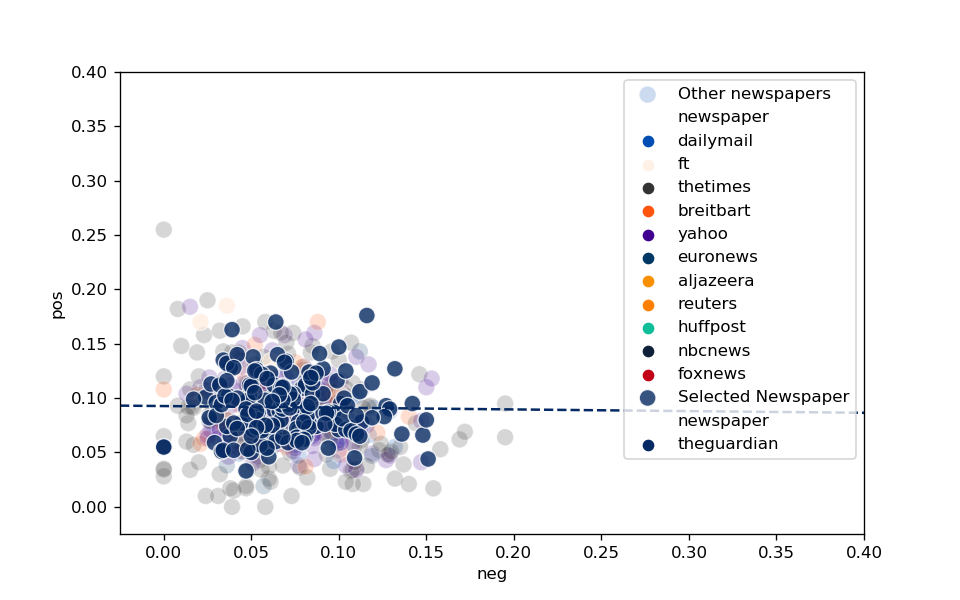

In [25]:
# Display the widgets
display(items_lda)
display(info_area)
display(items_sentiment)
#Plot size
plt.figure("Pos/Neg Plot",figsize=(8,5),edgecolor="b",facecolor="b",frameon=False)
# Plot the inital plot
action(drop_newspapers.value)